**Введение**

Уменьшение размерности, идея - уменьшить количество признаков, но при этом сохранить как можно больше информации

*Преимущества:*
- Уменьшается время обучения
- Уменьшается переобучение
- Устраняется мультиколлинеарность
- Устраняется шум
- Упрощается визуализация

**Реализация**

Импортируем необходимые модели


In [1]:
import sys
from sklearn.datasets import load_digits, load_iris
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time
import dataget
from gensim.models import Word2Vec
from gensim.downloader import load
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import MDS, Isomap
from sklearn.decomposition import FactorAnalysis, PCA
import scipy

Задаем используемые модели:

MDS - Multidimensional Scaling, нелинейный метод, старается сохранить "расстояния" между объектами при уменьшении размерности данных.

Isomap -  нелинейный метод, является расшриением MDS или Kernel PCA.

LDA - находит линейную комбинацию входных признаков, которая оптимизирует разделимость классов. В нем учитываются метки классов. Ограничения - данные должны быть нормально распределены, должны быть метки классов.

FA - факторный анализ, хорошо подходит для поиска скрытых переменных, выводимых из других (они и называются факторами).

In [2]:
mds = MDS(n_components=2, metric=True, random_state=2)
isomap = Isomap(n_neighbors=5, n_components=2, eigen_solver='auto')
lda = LinearDiscriminantAnalysis(n_components=2, solver='svd')
fa = FactorAnalysis(n_components=2, random_state=2)

Подгружаем датасеты.

In [12]:
#mnist
start = time.time()
mnist = pd.read_csv("https://www.openml.org/data/get_csv/52667/mnist_784.csv")
# mnist = mnist[:10000] # (70000, 785) -> (10000, 785)
display(f"Time of downloading mnist: {int(time.time() - start)} seconds")
                    
#digits
digits = load_digits()
display(f"Time of downloading digits: {int(time.time() - start)} seconds")
                    
#Fashion MNIST
start = time.time()
import dataget
__, __, fmnist_x, fmnist_y = dataget.image.fashion_mnist().get()
fmnist = fmnist_x.reshape(-1, 28*28)
display(f"Time of downloading fashion mnist: {int(time.time() - start)} seconds")

#coil20
start = time.time()
coil_20 = scipy.io.loadmat('COIL20_1.mat')
display(f"Time of downloading COIL 20: {int(time.time() - start)} seconds")

'Time of downloading mnist: 25 seconds'

'Time of downloading digits: 25 seconds'

'Time of downloading fashion mnist: 0 seconds'

'Time of downloading COIL 20: 0 seconds'

In [27]:
mnist = mnist[:10000] # (70000, 785) -> (10000, 785)

In [14]:
#Google news
start = time.time()
# word_vectors = load('word2vec-google-news-300').vectors
word_vectors = np.load('word_vectors.npy')
display(f"Time of downloading google news: {int(time.time() - start)} seconds")

'Time of downloading google news: 0 seconds'

In [15]:
word_vectors_cuted = word_vectors[:10000]

In [ ]:
np.save("word_vectors", word_vectors_cuted)

Для удобства группируем модели и датасеты.

In [28]:
models = [ 
    ("Isomap", isomap), ("LDA", lda), ("FA", fa)
    ]
datasets = [("MNIST", mnist, mnist['class']), 
            ("Fashion MNIST", fmnist, fmnist_y),
            ('Word Vectors', word_vectors_cuted, None),
            ("digits", digits.data, digits.target),
            ("coil20", coil_20["X"], coil_20["Y"])
            ]

Уменьшаем размерность разными алгоритмами и визуализируем.

In [ ]:
rows = len(models)
cols = len(datasets)
fig = plt.figure(figsize=(20, 17))
gs = fig.add_gridspec(rows, cols, hspace=0, wspace=0)
ax = gs.subplots()
for j in range(cols):
    ax[0, j].set_xlabel(datasets[j][0], fontsize=20)   
    ax[0, j].xaxis.set_label_position('top') 

for i in range(rows):
    ax[i, 0].set_ylabel(models[i][0], fontsize=20)   
    
for i in range(rows):
    for j in range(cols):
        display(f"{models[i][0]} is working with {datasets[j][0]} ({datasets[j][1].shape} objects)...")
        start = time.time()

        if models[i][0] == "LDA":
            if datasets[j][2] is not None:
                embedding = models[i][1].fit_transform(datasets[j][1], datasets[j][2])
            else:
                continue
        elif models[i][0] == "FA" or models[i][0] == "PCA":
            from sklearn.preprocessing import StandardScaler
            sc = StandardScaler()
            embedding = models[i][1].fit_transform(sc.fit_transform(datasets[j][1]))
        else:
            embedding = models[i][1].fit_transform(datasets[j][1])

        
        ax[i, j].scatter(embedding[:, 0], embedding[:, 1], c=datasets[j][2], cmap='Spectral', s=1)
        ax[i, j].set_yticklabels([])
        ax[i, j].set_xticklabels([])
        ax[i, j].tick_params(left = False, bottom=False)
        display(f"Time: {int(time.time() - start)} seconds")

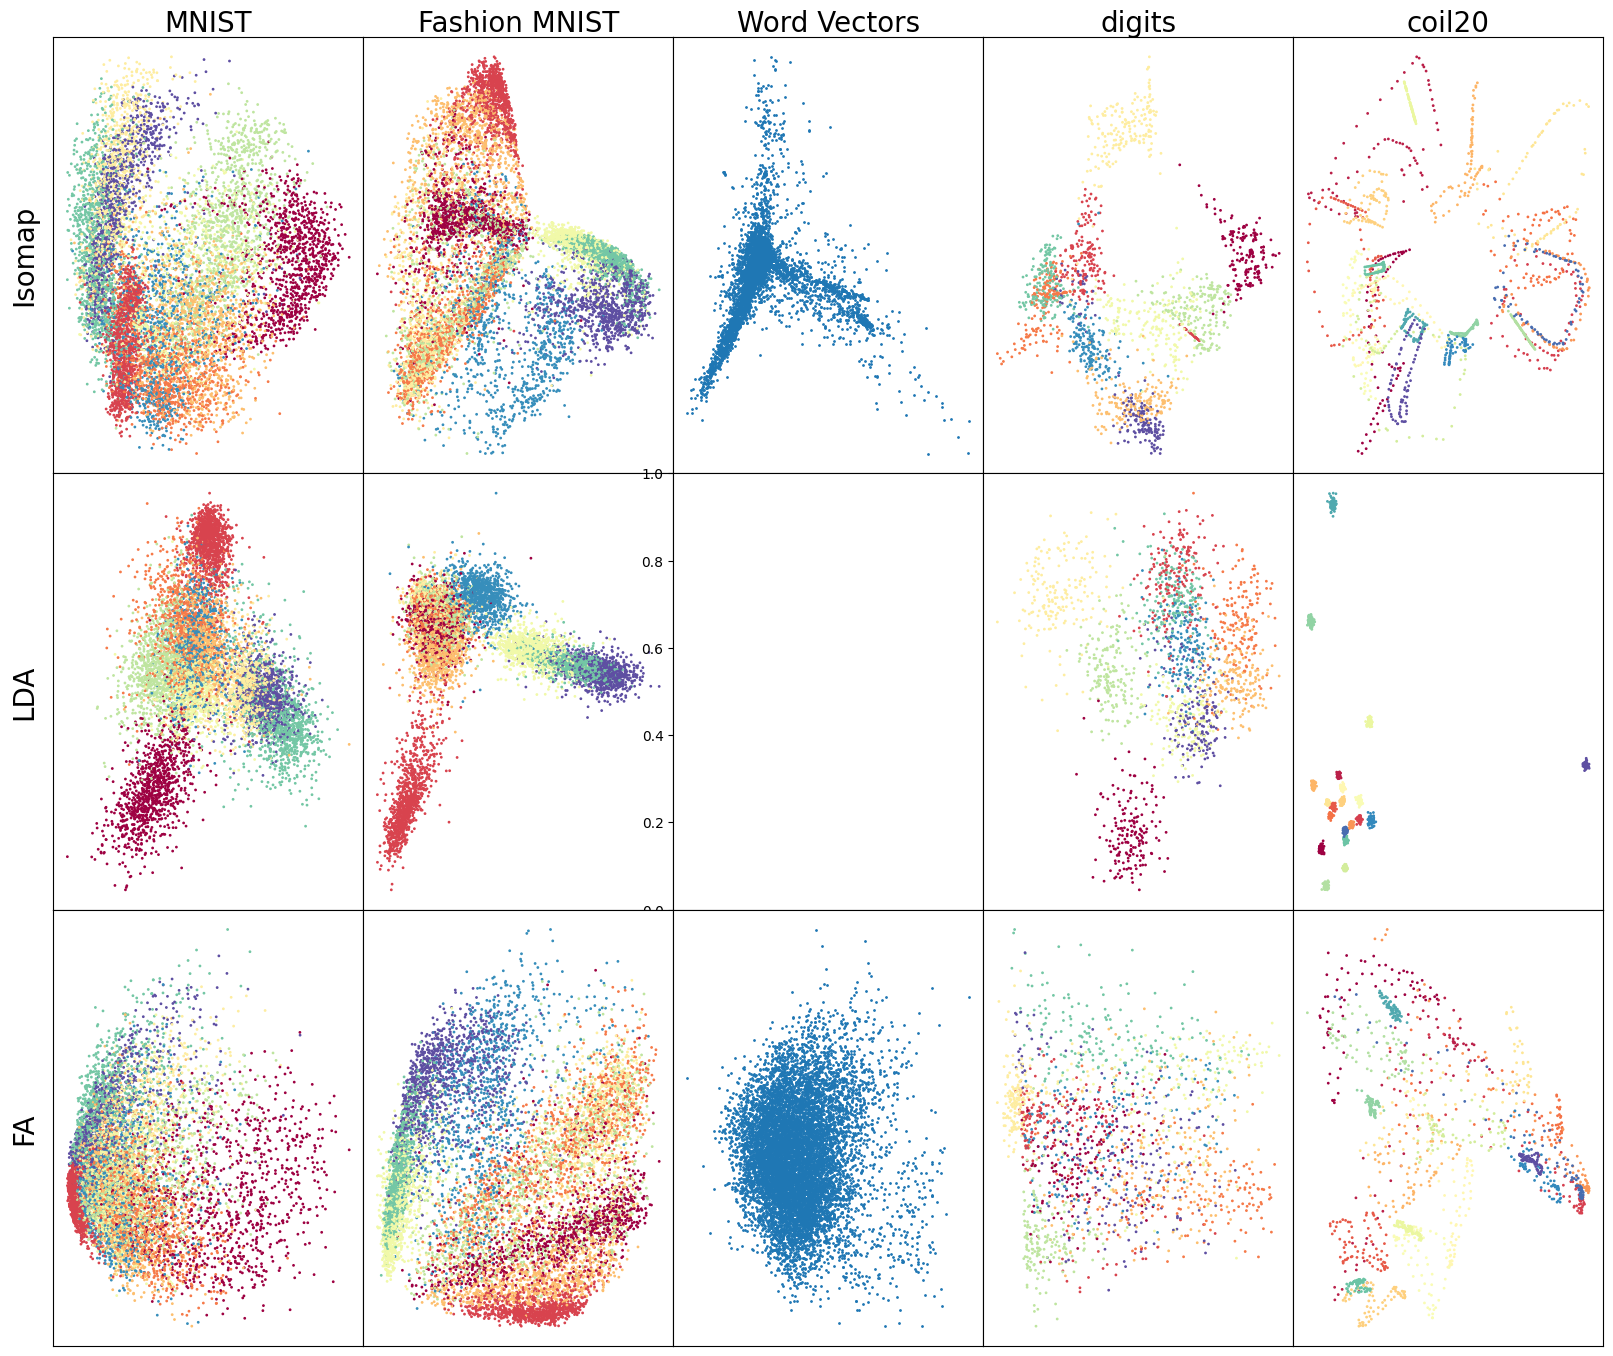

Картинка из статьи [UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction](https://arxiv.org/pdf/1802.03426.pdf)

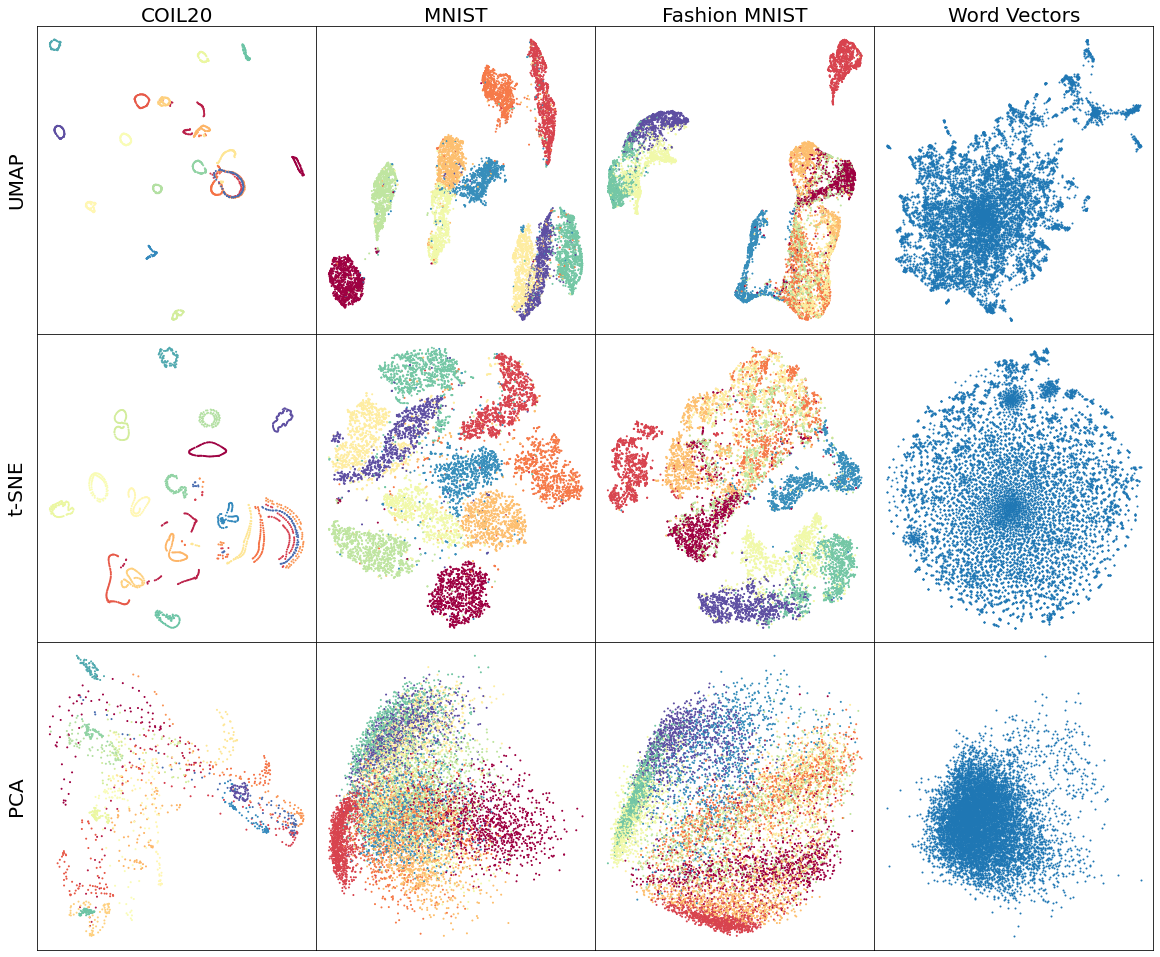

MDS...

'MDS is working with MNIST ((1000, 785) objects)...'

'Time: 30 seconds'

'MDS is working with Fashion MNIST ((1000, 784) objects)...'

'Time: 30 seconds'

'MDS is working with Word Vectors ((1000, 300) objects)...'

'Time: 31 seconds'

'MDS is working with digits ((1797, 64) objects)...'

'Time: 102 seconds'

'MDS is working with coil20 ((1000, 1024) objects)...'

'Time: 29 seconds'

'FA is working with MNIST ((1000, 785) objects)...'

'Time: 0 seconds'

'FA is working with Fashion MNIST ((1000, 784) objects)...'

'Time: 0 seconds'

'FA is working with Word Vectors ((1000, 300) objects)...'

'Time: 0 seconds'

'FA is working with digits ((1797, 64) objects)...'

'Time: 0 seconds'

'FA is working with coil20 ((1000, 1024) objects)...'

'Time: 0 seconds'

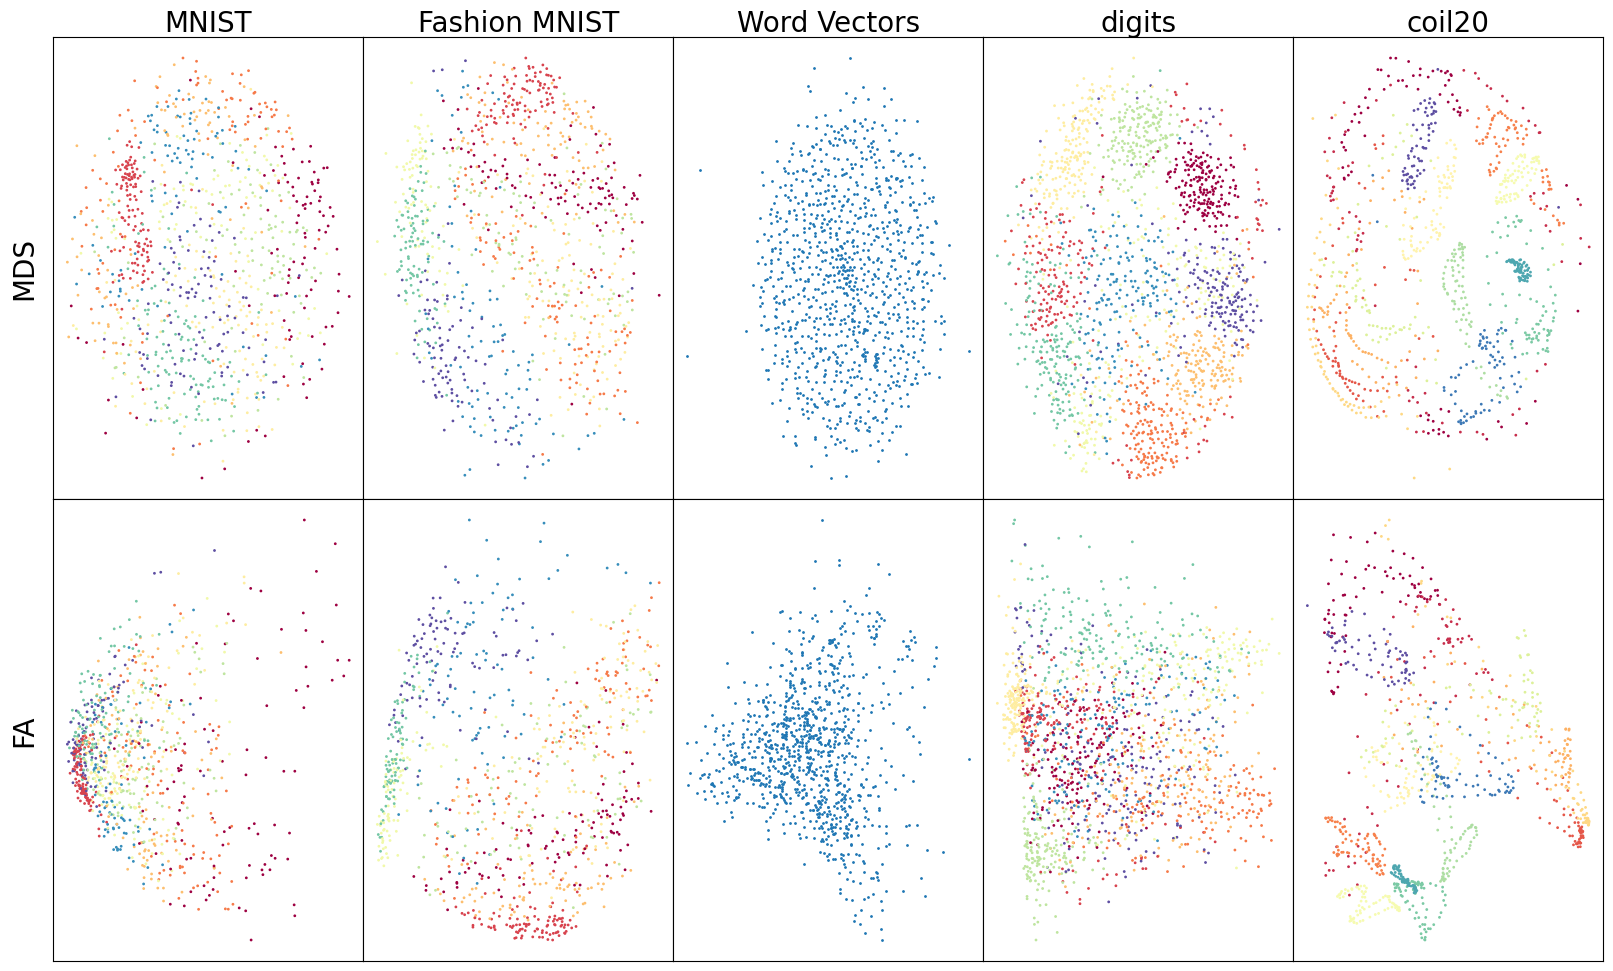

In [20]:
models = [ 
    ("MDS", mds),
    ("FA", fa)]
datasets = [("MNIST", mnist[:1000], mnist['class'][:1000]), 
            ("Fashion MNIST", fmnist[:1000], fmnist_y[:1000]),
            ('Word Vectors', word_vectors_cuted[:1000], None),
            ("digits", digits.data, digits.target),
            ("coil20", coil_20["X"][:1000], coil_20["Y"][:1000])
            ]
rows = len(models)
cols = len(datasets)
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(rows, cols, hspace=0, wspace=0)
ax = gs.subplots()
for j in range(cols):
    ax[0, j].set_xlabel(datasets[j][0], fontsize=20)   
    ax[0, j].xaxis.set_label_position('top') 

for i in range(rows):
    ax[i, 0].set_ylabel(models[i][0], fontsize=20)   
    
for i in range(rows):
    for j in range(cols):
        display(f"{models[i][0]} is working with {datasets[j][0]} ({datasets[j][1].shape} objects)...")
        start = time.time()

        if models[i][0] == "LDA":
            if datasets[j][2] is not None:
                embedding = models[i][1].fit_transform(datasets[j][1], datasets[j][2])
            else:
                continue
        elif models[i][0] == "FA" or models[i][0] == "PCA":
            from sklearn.preprocessing import StandardScaler
            sc = StandardScaler()
            embedding = models[i][1].fit_transform(sc.fit_transform(datasets[j][1]))
        else:
            embedding = models[i][1].fit_transform(datasets[j][1])

        
        ax[i, j].scatter(embedding[:, 0], embedding[:, 1], c=datasets[j][2], cmap='Spectral', s=1)
        ax[i, j].set_yticklabels([])
        ax[i, j].set_xticklabels([])
        ax[i, j].tick_params(left = False, bottom=False)
        display(f"Time: {int(time.time() - start)} seconds")

Ссылка на источник:
- [11 Dimensionality reduction techniques you should know in 2021](https://towardsdatascience.com/11-dimensionality-reduction-techniques-you-should-know-in-2021-dcb9500d388b)